In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
try:
    #plt.style.use('belle2')
    #plt.style.use('belle2_serif')
    plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

In [4]:
import os
import pandas as pd
import numpy as np
from pandas import HDFStore
from os import path
from yaml import safe_load

from hist.get_data import get_data
from hist.bkg_stack import generic_ntuple, get_data_in_module
from read_yaml_to_dict import read_yaml_to_dict
from src.sample_name import sample_name
from src.combine_cuts import combine_cuts
print(os.getcwd())

Welcome to JupyROOT 6.26/04
For optimal usage set `plt.style.use('belle2')`
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/jykim/workspace/DRAW/read_yaml_to_dict.py
/home/jykim/workspace/DRAW
{'Vegetables': ['Pepper', 'Tomato', 'Garlic']}
/home/jykim/workspace/DRAW


In [5]:
from hist.draw_stack import draw_stack_include_signal
from hist.draw_stack import draw_stack_except_signal
from hist.draw_stack import draw_stack_no_signal
from hist.draw_stack import b2helix, lumi, watermark

In [6]:
#plot_variables = read_yaml_to_dict("plot_variables")
plot_variables = read_yaml_to_dict("massveto_variables")
print(plot_variables)

{'vars': ['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_CMS_E', 'gamma_clusterSecondMoment', 'gamma_genMotherID', 'gamma_genMotherPDG', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV', 'Pi0_Prob_100MeV', 'Pi0_Prob_125MeV', 'Pi0_Prob_150MeV', 'Eta_Prob', 'Eta_Prob_50MeV', 'Eta_Prob_75MeV', 'Eta_Prob_100MeV', 'Eta_Prob_125MeV', 'Eta_Prob_150MeV', 'Eta_Prob_175MeV', 'Eta_Prob_200MeV', 'ROE_Pi0_InvM', 'ROE_Pi0_InvM_50MeV', 'ROE_Pi0_InvM_75MeV', 'ROE_Pi0_InvM_100MeV', 'ROE_Pi0_InvM_125MeV', 'ROE_Pi0_InvM_150MeV', 'ROE_Eta_InvM', 'ROE_Eta_InvM_50MeV', 'ROE_Eta_InvM_75MeV', 'ROE_Eta_InvM_100MeV', 'ROE_Eta_InvM_125MeV', 'ROE_Eta_InvM_150MeV', 'ROE_Eta_InvM_175MeV', 'ROE_Eta_InvM_200MeV', 'Pi0_soft_genMotherPDG', 'Pi0_soft_genMotherPDG_50MeV', 'Pi0_soft_genMotherPDG_75MeV', 'Pi0_soft_genMotherPDG_100MeV', 'Pi0_soft_genMotherPDG_125MeV', 'Pi0_soft_genMotherPDG_150MeV', 'Eta_soft_g

In [5]:
location='lab_local'
location='lab_ssd'
#location='kekcc'
#location='laptop'

In [6]:
sample_info = read_yaml_to_dict("samples")
#print(sample_info)

In [7]:
option = 'pid_0_5'
option = 'pid_0_5_no_signal'
option = 'massveto'

sample_loc=sample_name(option=option, location=location, sample_info=sample_info) 
#sample_loc=sample_name(option='pid_0_5_no_signal', location=location) 
print(sample_loc )

{'ccbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/massveto_0_3_ccbar_recon_output_00.root', 'charged': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/charged/massveto_0_3_charged_recon_output_00.root', 'mixed': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/mixed/massveto_0_3_mixed_recon_output_00.root', 'uubar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/uubar/massveto_0_3_uubar_recon_output_00.root', 'ddbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ddbar/massveto_0_3_ddbar_recon_output_00.root', 'ssbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ssbar/massveto_0_3_ssbar_recon_output_00.root', 'taupair': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/taupair/massveto_0_3_taupair_recon_output_00.root'}


In [8]:
List = ['phi', 'antiKstar', 'rho', 'omega']
extract_variables = "plot_variables"
extract_variables = "massveto_variables"

In [31]:
for mode in List:
    if mode == 'phi':
        plot_variables = read_yaml_to_dict(extract_variables )
        pd_phi = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'antiKstar':
        plot_variables = read_yaml_to_dict(extract_variables )
        pd_antiKstar = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'rho':
        plot_variables = read_yaml_to_dict(extract_variables )
        pd_rho = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'omega':
        plot_variables = read_yaml_to_dict(extract_variables )
        pd_omega = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
        

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_CMS_E', 'gamma_clusterSecondMoment', 'gamma_genMotherID', 'gamma_genMotherPDG', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Pi0_Prob_50MeV', 'Pi0_Prob_75MeV', 'Pi0_Prob_100MeV', 'Pi0_Prob_125MeV', 'Pi0_Prob_150MeV', 'Eta_Prob', 'Eta_Prob_50MeV', 'Eta_Prob_75MeV', 'Eta_Prob_100MeV', 'Eta_Prob_125MeV', 'Eta_Prob_150MeV', 'Eta_Prob_175MeV', 'Eta_Prob_200MeV', 'ROE_Pi0_InvM', 'ROE_Pi0_InvM_50MeV', 'ROE_Pi0_InvM_75MeV', 'ROE_Pi0_InvM_100MeV', 'ROE_Pi0_InvM_125MeV', 'ROE_Pi0_InvM_150MeV', 'ROE_Eta_InvM', 'ROE_Eta_InvM_50MeV', 'ROE_Eta_InvM_75MeV', 'ROE_Eta_InvM_100MeV', 'ROE_Eta_InvM_125MeV', 'ROE_Eta_InvM_150MeV', 'ROE_Eta_InvM_175MeV', 'ROE_Eta_InvM_200MeV', 'Pi0_soft_genMotherPDG', 'Pi0_soft_genMotherPDG_50MeV', 'Pi0_soft_genMotherPDG_75MeV', 'Pi0_soft_genMotherPDG_100MeV', 'Pi0_soft_genMotherPDG_125MeV', 'Pi0_soft_genMotherPDG_150MeV', 'Eta_soft_genMotherP

In [32]:
for mode in List:
    if mode == 'phi':
        pd_phi.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 
    elif mode == 'antiKstar':
        pd_antiKstar.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 
    elif mode == 'rho':
        pd_rho.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 
    elif mode =='omega':  
        pd_omega.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 

sig_eff_list = list()
# bkg_rej_list = list()

In [7]:
file = '/home/jykim/workspace/data/1ab_generic/pid_0_5_phi.h5'
file = '/home/belle2/jaeyoung/DRAW/massveto_antiKstar.h5'
file = '/media/jykim/ssd_T5/storage/hdf_files/massveto_antiKstar.h5'
#file = '/media/jykim/ssd_T5/storage/hdf_files/massveto_rho.h5'
#file = '/media/jykim/ssd_T5/storage/hdf_files/massveto_phi.h5'
#file = '/media/jykim/ssd_T5/storage/hdf_files/massveto_omega.h5'
df_antiKstar = pd.read_hdf(file, key='jykim')
# df_antiKstar.Phi_InvM

In [8]:
plot_variables_antiKstar = read_yaml_to_dict("plot_variables")
plot_variables_antiKstar['vars'].append('class')
plot_variables_antiKstar['vars'].append('ROE_Pi0_InvM')
plot_variables_antiKstar['vars'].append('ROE_Pi0_InvM_50MeV')
plot_variables_antiKstar['vars'].append('ROE_Pi0_InvM_75MeV')
plot_variables_antiKstar['vars'].append('ROE_Pi0_InvM_100MeV')
plot_variables_antiKstar['vars'].append('ROE_Pi0_InvM_125MeV')
plot_variables_antiKstar['vars'].append('ROE_Pi0_InvM_150MeV')


plot_variables_antiKstar['vars'].append('ROE_Eta_InvM')
plot_variables_antiKstar['vars'].append('ROE_Eta_InvM_50MeV')
plot_variables_antiKstar['vars'].append('ROE_Eta_InvM_75MeV')
plot_variables_antiKstar['vars'].append('ROE_Eta_InvM_100MeV')
plot_variables_antiKstar['vars'].append('ROE_Eta_InvM_125MeV')
plot_variables_antiKstar['vars'].append('ROE_Eta_InvM_150MeV')
plot_variables_antiKstar['vars'].append('ROE_Eta_InvM_175MeV')
plot_variables_antiKstar['vars'].append('ROE_Eta_InvM_200MeV')

print(plot_variables_antiKstar['vars'])

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'class', 'ROE_Pi0_InvM', 'ROE_Pi0_InvM_50MeV', 'ROE_Pi0_InvM_75MeV', 'ROE_Pi0_InvM_100MeV', 'ROE_Pi0_InvM_125MeV', 'ROE_Pi0_InvM_150MeV', 'ROE_Eta_InvM', 'ROE_Eta_InvM_50MeV', 'ROE_Eta_InvM_75MeV', 'ROE_Eta_InvM_100MeV', 'ROE_Eta_InvM_125MeV', 'ROE_Eta_InvM_150MeV', 'ROE_Eta_InvM_175MeV', 'ROE_Eta_InvM_200MeV']


In [9]:
signal_extraction_cuts = read_yaml_to_dict("cuts")
#print(antiKstar_extraction)
new_Cuts = ''
#new_Cuts = combine_cuts(signal_extraction_cuts, 'antiKstar_extraction')
# new_Cuts = combine_cuts(signal_extraction_cuts, 'rho_extraction')
# new_Cuts = combine_cuts(signal_extraction_cuts, 'phi_extraction')
# new_Cuts = combine_cuts(signal_extraction_cuts, 'omega_extraction')
#new_Cuts += '& (ROE_Pi0_InvM_75MeV<0.120 or ROE_Pi0_InvM_75MeV>0.145) '

#new_Cuts = '(ROE_Pi0_InvM_75MeV<0.120 or ROE_Pi0_InvM_75MeV>0.145) & Pi0_soft_genMotherPDG_75MeV==111 & gamma_genMotherPDG==111 & Pi0_soft_genMotherID_75MeV==gamma_genMotherID'

#new_Cuts = '  & (ROE_Pi0_InvM_75MeV<0.3) & Pi0_soft_genMotherPDG_75MeV==111 '
#new_Cuts = '(ROE_Pi0_InvM_75MeV<0.3) & Pi0_soft_genMotherPDG_75MeV==111 & gamma_genMotherPDG==111 & gamma_genMotherPDG==111 & Pi0_soft_genMotherID_75MeV==gamma_genMotherID'

# new_Cuts += '& (ROE_Pi0_InvM_75MeV<0.3) & Pi0_soft_genMotherPDG_75MeV==111 & gamma_genMotherPDG==111'

#new_Cuts += '& (ROE_Pi0_InvM_75MeV<0.120 or ROE_Pi0_InvM_75MeV>0.145) '



print(new_Cuts)

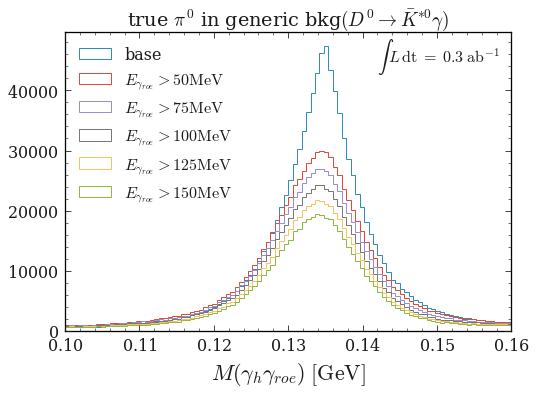

In [11]:
cols = ['Pi0_soft_genMotherPDG_75MeV','gamma_genMotherPDG','Pi0_soft_genMotherID_75MeV','gamma_genMotherID']
df_antiKstar[cols]=df_antiKstar[cols].fillna(0.0).astype(int)

new_Cuts = ' Pi0_soft_genMotherPDG_75MeV==111 & gamma_genMotherPDG==111 & Pi0_soft_genMotherID_75MeV==gamma_genMotherID'
new_Cuts = 'gamma_genMotherPDG==111'
df_antiKstar_extraction = df_antiKstar.query(new_Cuts)
pd_df = df_antiKstar_extraction

#df_no_phi_extraction = df_no.query(new_Cuts)
#df_antiKstar[df_antiKstar['gamma_genMotherPDG']==421].gamma_genMotherPDG
#print(df_antiKstar_extraction.gamma_genMotherID)
#print(df_antiKstar_extraction.Pi0_soft_genMotherID_75MeV)

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM']<0.16) & (pd_df['ROE_Pi0_InvM']>0.1)].ROE_Pi0_InvM, label=r'base',bins=100,  histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_50MeV']<0.16) & (pd_df['ROE_Pi0_InvM_50MeV']>0.1) ].ROE_Pi0_InvM_50MeV, label=r'$E_{\gamma_{roe}}>50\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_75MeV']<0.16) & (pd_df['ROE_Pi0_InvM_75MeV']>0.1)].ROE_Pi0_InvM_75MeV, label=r'$E_{\gamma_{roe}}>75\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_100MeV']<0.16) & (pd_df['ROE_Pi0_InvM_100MeV']>0.1)].ROE_Pi0_InvM_100MeV, label=r'$E_{\gamma_{roe}}>100\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_125MeV']<0.16) & (pd_df['ROE_Pi0_InvM_125MeV']>0.1)].ROE_Pi0_InvM_125MeV, label=r'$E_{\gamma_{roe}}>125\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_150MeV']<0.16) & (pd_df['ROE_Pi0_InvM_150MeV']>0.1)].ROE_Pi0_InvM_150MeV, label=r'$E_{\gamma_{roe}}>150\mathrm{MeV}$',bins=100,histtype='step')
total_lumi = "$0.3\; \mathrm{ab}^{-1}$"

plot_title = r'true $\pi^0$ in generic bkg$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
xlabel = r'$M(\gamma_h \gamma_{roe}) \; [\mathrm{GeV}]$'
ax = plt.gca()
ax.set_xlim(0.10,0.16)

ax.set_xlabel(xlabel)
plt.title(plot_title)
lumi(l=total_lumi)

plt.legend(loc='upper left')

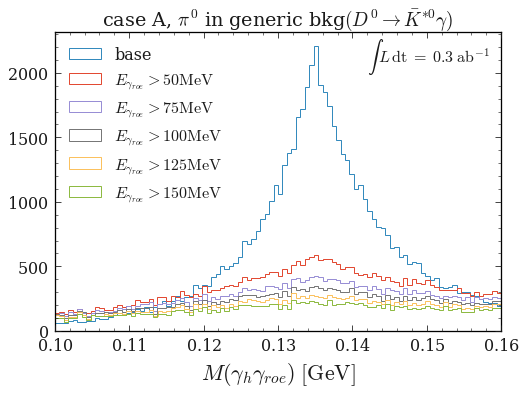

In [24]:
cols = ['Pi0_soft_genMotherPDG_75MeV','gamma_genMotherPDG','Pi0_soft_genMotherID_75MeV','gamma_genMotherID']
df_antiKstar[cols]=df_antiKstar[cols].fillna(0.0).astype(int)

new_Cuts = ' Pi0_soft_genMotherPDG_75MeV==111  & gamma_genMotherPDG!=111'
df_antiKstar_extraction = df_antiKstar.query(new_Cuts)
pd_df = df_antiKstar_extraction

#df_no_phi_extraction = df_no.query(new_Cuts)
#df_antiKstar[df_antiKstar['gamma_genMotherPDG']==421].gamma_genMotherPDG
#print(df_antiKstar_extraction.gamma_genMotherID)
#print(df_antiKstar_extraction.Pi0_soft_genMotherID_75MeV)

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM']<0.16) & (pd_df['ROE_Pi0_InvM']>0.1)].ROE_Pi0_InvM, label=r'base',bins=100,  histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_50MeV']<0.16) & (pd_df['ROE_Pi0_InvM_50MeV']>0.1) ].ROE_Pi0_InvM_50MeV, label=r'$E_{\gamma_{roe}}>50\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_75MeV']<0.16) & (pd_df['ROE_Pi0_InvM_75MeV']>0.1)].ROE_Pi0_InvM_75MeV, label=r'$E_{\gamma_{roe}}>75\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_100MeV']<0.16) & (pd_df['ROE_Pi0_InvM_100MeV']>0.1)].ROE_Pi0_InvM_100MeV, label=r'$E_{\gamma_{roe}}>100\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_125MeV']<0.16) & (pd_df['ROE_Pi0_InvM_125MeV']>0.1)].ROE_Pi0_InvM_125MeV, label=r'$E_{\gamma_{roe}}>125\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_150MeV']<0.16) & (pd_df['ROE_Pi0_InvM_150MeV']>0.1)].ROE_Pi0_InvM_150MeV, label=r'$E_{\gamma_{roe}}>150\mathrm{MeV}$',bins=100,histtype='step')
total_lumi = "$0.3\; \mathrm{ab}^{-1}$"

plot_title = r'case A, $\pi^0$ in generic bkg$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
xlabel = r'$M(\gamma_h \gamma_{roe}) \; [\mathrm{GeV}]$'
ax = plt.gca()
ax.set_xlim(0.10,0.16)
ax.set_xlabel(xlabel)
plt.title(plot_title)
lumi(l=total_lumi)

plt.legend(loc='upper left')

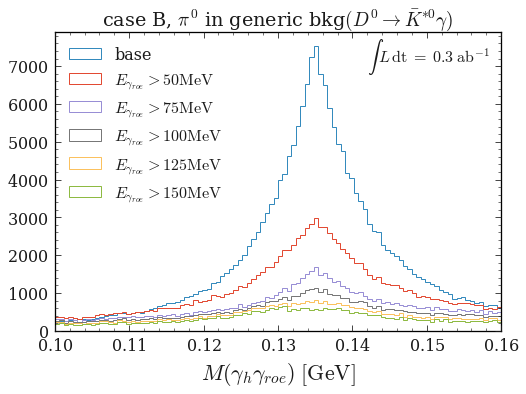

In [25]:
cols = ['Pi0_soft_genMotherPDG_75MeV','gamma_genMotherPDG','Pi0_soft_genMotherID_75MeV','gamma_genMotherID']
df_antiKstar[cols]=df_antiKstar[cols].fillna(0.0).astype(int)

new_Cuts = ' Pi0_soft_genMotherPDG_75MeV!=111 & gamma_genMotherPDG==111'
df_antiKstar_extraction = df_antiKstar.query(new_Cuts)
pd_df = df_antiKstar_extraction

#df_no_phi_extraction = df_no.query(new_Cuts)
#df_antiKstar[df_antiKstar['gamma_genMotherPDG']==421].gamma_genMotherPDG
#print(df_antiKstar_extraction.gamma_genMotherID)
#print(df_antiKstar_extraction.Pi0_soft_genMotherID_75MeV)

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM']<0.16) & (pd_df['ROE_Pi0_InvM']>0.1)].ROE_Pi0_InvM, label=r'base',bins=100,  histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_50MeV']<0.16) & (pd_df['ROE_Pi0_InvM_50MeV']>0.1) ].ROE_Pi0_InvM_50MeV, label=r'$E_{\gamma_{roe}}>50\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_75MeV']<0.16) & (pd_df['ROE_Pi0_InvM_75MeV']>0.1)].ROE_Pi0_InvM_75MeV, label=r'$E_{\gamma_{roe}}>75\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_100MeV']<0.16) & (pd_df['ROE_Pi0_InvM_100MeV']>0.1)].ROE_Pi0_InvM_100MeV, label=r'$E_{\gamma_{roe}}>100\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_125MeV']<0.16) & (pd_df['ROE_Pi0_InvM_125MeV']>0.1)].ROE_Pi0_InvM_125MeV, label=r'$E_{\gamma_{roe}}>125\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_150MeV']<0.16) & (pd_df['ROE_Pi0_InvM_150MeV']>0.1)].ROE_Pi0_InvM_150MeV, label=r'$E_{\gamma_{roe}}>150\mathrm{MeV}$',bins=100,histtype='step')
total_lumi = "$0.3\; \mathrm{ab}^{-1}$"

plot_title = r'case B, $\pi^0$ in generic bkg$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
xlabel = r'$M(\gamma_h \gamma_{roe}) \; [\mathrm{GeV}]$'
ax = plt.gca()
ax.set_xlim(0.10,0.16)
ax.set_xlabel(xlabel)
plt.title(plot_title)
lumi(l=total_lumi)

plt.legend(loc='upper left')

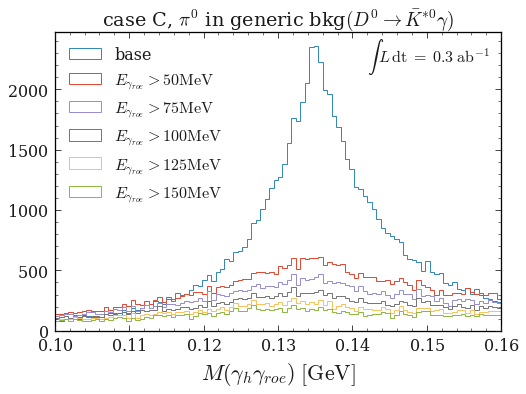

In [27]:
cols = ['Pi0_soft_genMotherPDG_75MeV','gamma_genMotherPDG','Pi0_soft_genMotherID_75MeV','gamma_genMotherID']
df_antiKstar[cols]=df_antiKstar[cols].fillna(0.0).astype(int)

new_Cuts = ' Pi0_soft_genMotherPDG_75MeV!=111 & gamma_genMotherPDG!=111'
df_antiKstar_extraction = df_antiKstar.query(new_Cuts)
pd_df = df_antiKstar_extraction

#df_no_phi_extraction = df_no.query(new_Cuts)
#df_antiKstar[df_antiKstar['gamma_genMotherPDG']==421].gamma_genMotherPDG
#print(df_antiKstar_extraction.gamma_genMotherID)
#print(df_antiKstar_extraction.Pi0_soft_genMotherID_75MeV)

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM']<0.16) & (pd_df['ROE_Pi0_InvM']>0.1)].ROE_Pi0_InvM, label=r'base',bins=100,  histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_50MeV']<0.16) & (pd_df['ROE_Pi0_InvM_50MeV']>0.1) ].ROE_Pi0_InvM_50MeV, label=r'$E_{\gamma_{roe}}>50\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_75MeV']<0.16) & (pd_df['ROE_Pi0_InvM_75MeV']>0.1)].ROE_Pi0_InvM_75MeV, label=r'$E_{\gamma_{roe}}>75\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_100MeV']<0.16) & (pd_df['ROE_Pi0_InvM_100MeV']>0.1)].ROE_Pi0_InvM_100MeV, label=r'$E_{\gamma_{roe}}>100\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_125MeV']<0.16) & (pd_df['ROE_Pi0_InvM_125MeV']>0.1)].ROE_Pi0_InvM_125MeV, label=r'$E_{\gamma_{roe}}>125\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Pi0_InvM_150MeV']<0.16) & (pd_df['ROE_Pi0_InvM_150MeV']>0.1)].ROE_Pi0_InvM_150MeV, label=r'$E_{\gamma_{roe}}>150\mathrm{MeV}$',bins=100,histtype='step')
total_lumi = "$0.3\; \mathrm{ab}^{-1}$"

plot_title = r'case C, $\pi^0$ in generic bkg$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
xlabel = r'$M(\gamma_h \gamma_{roe}) \; [\mathrm{GeV}]$'
ax = plt.gca()
ax.set_xlim(0.10,0.16)
ax.set_xlabel(xlabel)
plt.title(plot_title)
lumi(l=total_lumi)

plt.legend(loc='upper left')

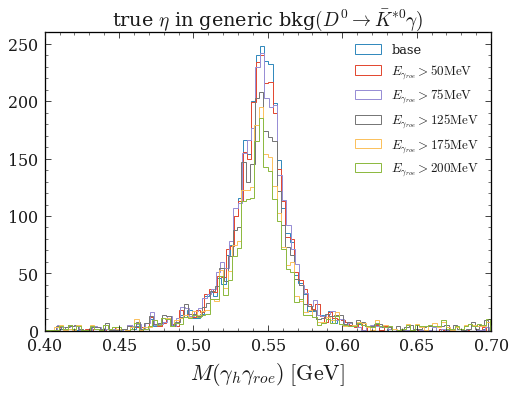

In [13]:
plt.hist(pd_df[(pd_df['ROE_Eta_InvM']<0.7) & (pd_df['ROE_Eta_InvM']>0.4)].ROE_Eta_InvM, label=r'base',bins=100,  histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_50MeV']<0.7) & (pd_df['ROE_Eta_InvM_50MeV']>0.4) ].ROE_Eta_InvM_50MeV, label=r'$E_{\gamma_{roe}}>50\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_75MeV']<0.7) & (pd_df['ROE_Eta_InvM_75MeV']>0.4)].ROE_Eta_InvM_75MeV, label=r'$E_{\gamma_{roe}}>75\mathrm{MeV}$',bins=100,histtype='step')

#plt.hist(pd_df[(pd_df['ROE_Eta_InvM_100MeV']<0.7) & (pd_df['ROE_Eta_InvM_100MeV']>0.4)].ROE_Eta_InvM_100MeV, label=r'$E_{\gamma_{roe}}>100\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_125MeV']<0.7) & (pd_df['ROE_Eta_InvM_125MeV']>0.4)].ROE_Eta_InvM_125MeV, label=r'$E_{\gamma_{roe}}>125\mathrm{MeV}$',bins=100,histtype='step')

#plt.hist(pd_df[(pd_df['ROE_Eta_InvM_150MeV']<0.7) & (pd_df['ROE_Eta_InvM_150MeV']>0.4)].ROE_Eta_InvM_150MeV, label=r'$E_{\gamma_{roe}}>150\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_175MeV']<0.7) & (pd_df['ROE_Eta_InvM_175MeV']>0.4)].ROE_Eta_InvM_175MeV, label=r'$E_{\gamma_{roe}}>175\mathrm{MeV}$',bins=100,histtype='step')

plt.hist(pd_df[(pd_df['ROE_Eta_InvM_200MeV']<0.7) & (pd_df['ROE_Eta_InvM_200MeV']>0.4)].ROE_Eta_InvM_200MeV, label=r'$E_{\gamma_{roe}}>200\mathrm{MeV}$',bins=100,histtype='step')


plot_title = r'true $\eta$ in generic bkg$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
xlabel = r'$M(\gamma_h \gamma_{roe}) \; [\mathrm{GeV}]$'
ax = plt.gca()
ax.set_xlim(0.40,0.7)
ax.set_xlabel(xlabel)
plt.title(plot_title)

plt.legend(loc='upper right',fontsize=13)

{'D0_M': 'M(D^0)', 'Dstarp_Q': 'Q', 'D0_cosHel_0': 'mathrm{cos}Hel_0', 'Dstarp_CMS_p': 'P_{D^{*+}_{CMS}}', 'gamma_E': 'E_{gamma}', 'gamma_clusterSecondMoment': 'clusterSecondmoment(gamma)', '__ncandidates__': 'ncandidiates', '__experiment__': 'experiment', '__run__': 'run', '__event__': 'event', 'Dstarp_isSignal': 'Dstarp isSignal', 'D0_isSignal': 'D0 isSignal', 'Phi_InvM': 'M(/phi)', 'Rho_InvM': 'M(/rho^0)', 'antiKstar_InvM': 'M(/bar{K}^{*0})', 'Omega_InvM': 'M(/omega)', 'gamma_CMS_E': 'E_{CMS}(gamma)', 'gamma_genMotherID': 'gamma_genMotherID', 'gamma_genMotherPDG': 'gamma_genMotherPDG', 'Pi0_Prob': ''}
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'class', 'ROE_Pi0_InvM_75MeV']


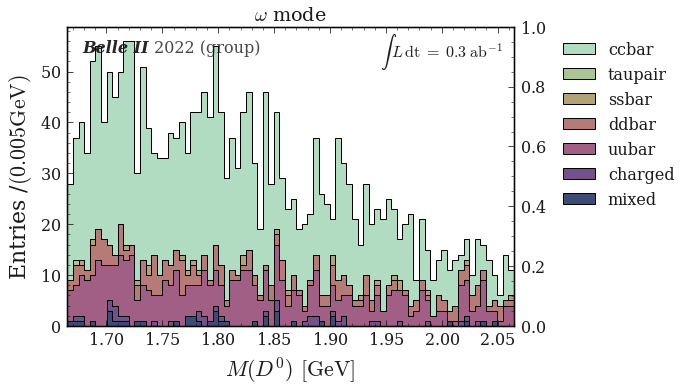

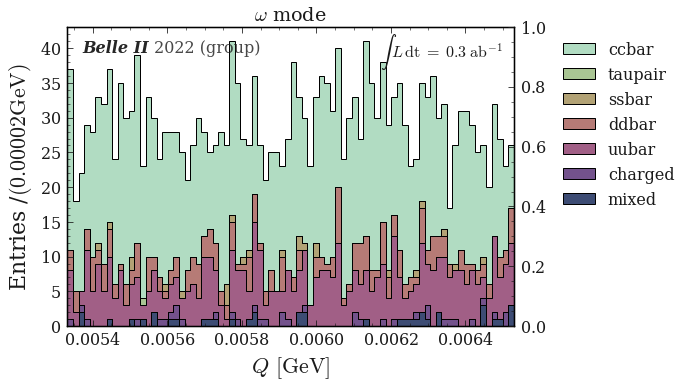

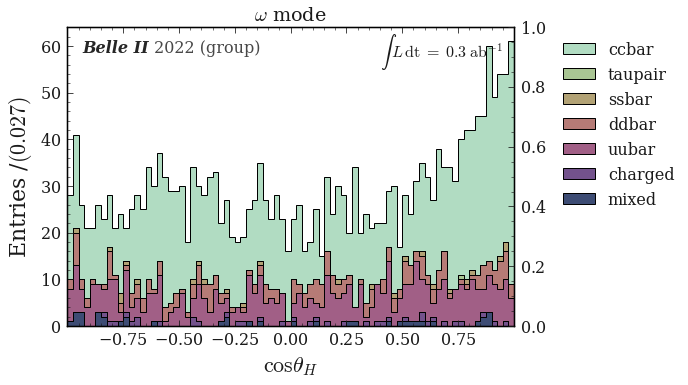

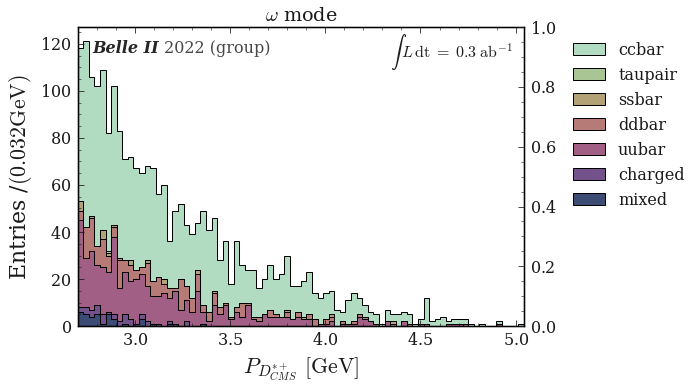

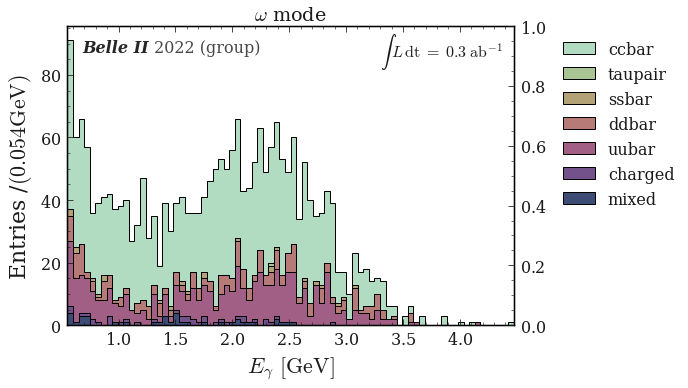

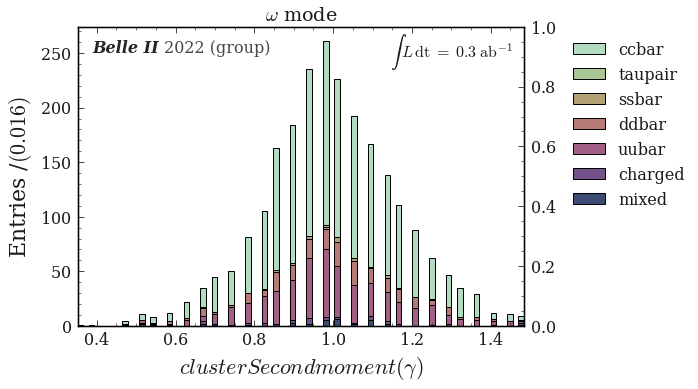

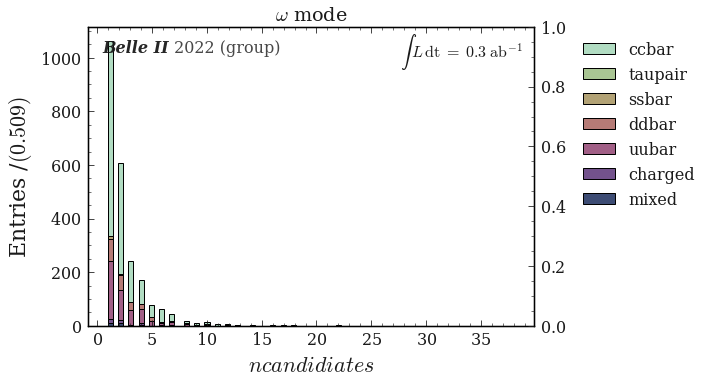

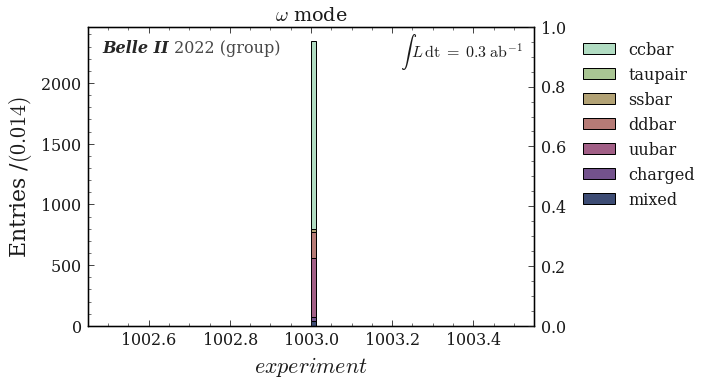

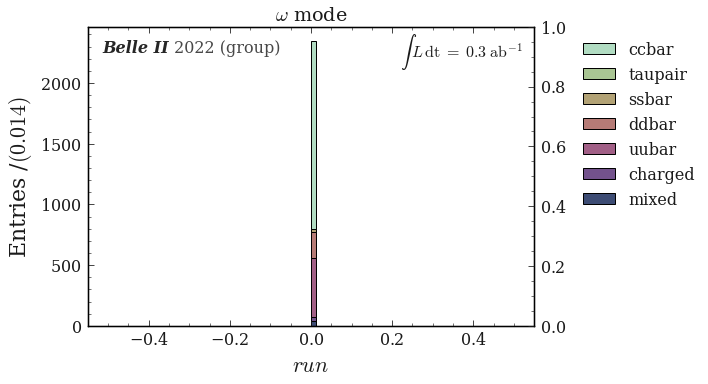

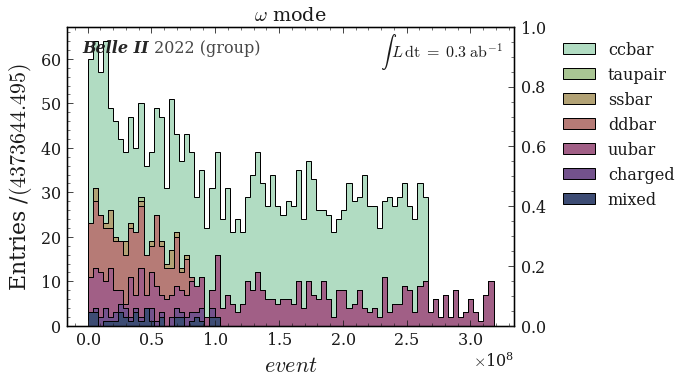

/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


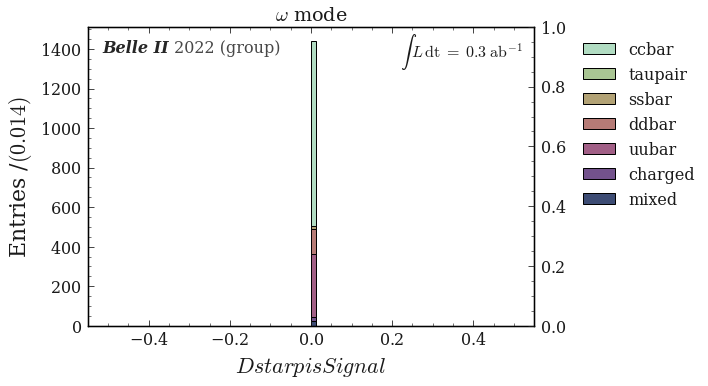

/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


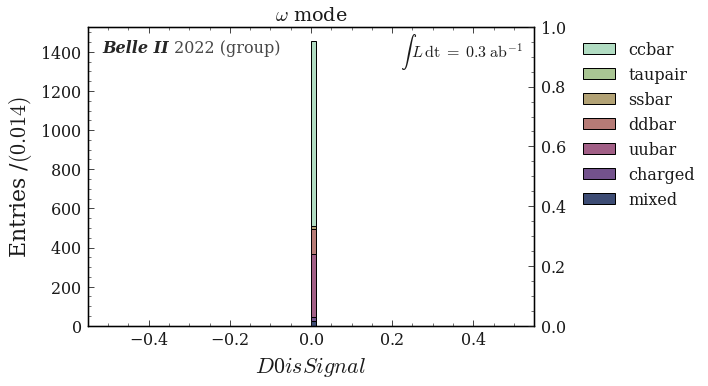

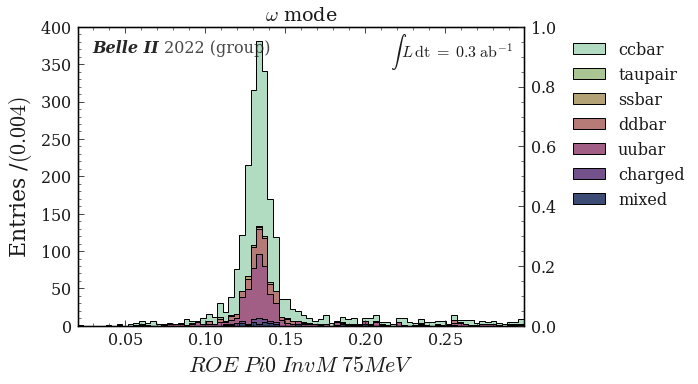

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [42]:
var_unit_antiKstar = read_yaml_to_dict("vars_name_units")

var_unit_antiKstar = var_unit_antiKstar['units']

var_name_antiKstar = read_yaml_to_dict("vars_name_units")
var_name_antiKstar = var_name_antiKstar['name']
print(var_name_antiKstar)
plot_title = r'$\bar{K}^{*0}$ mode'
plot_title = r'$\rho^0$ mode'
plot_title = r'$\phi$ mode'
plot_title = r'$\omega$ mode'

total_lumi = "$0.3\; \mathrm{ab}^{-1}$"
draw_variables=plot_variables_antiKstar['vars']
print(draw_variables)
draw_stack_no_signal(df=df_antiKstar_extraction,bins=80, vector='omega', var_name=var_name_antiKstar,var_unit=var_unit_antiKstar, plot_title=plot_title, total_lumi= total_lumi,draw_variables=draw_variables)            



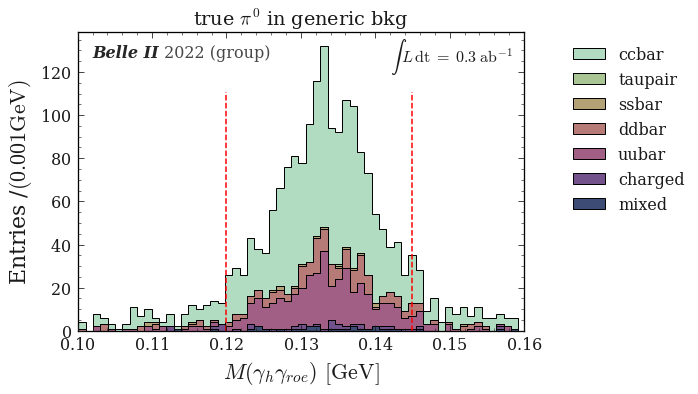

<Figure size 576x396 with 0 Axes>

In [43]:
var = 'ROE_Pi0_InvM_75MeV'
df=df_antiKstar_extraction
df=df.query('ROE_Pi0_InvM_75MeV > 0.10 & ROE_Pi0_InvM_75MeV < 0.160')
vector = 'antiKstar'
bins=60
the_var_name = 'M(\gamma_h \gamma_{roe})'
the_var_unit = '\mathrm{GeV}'
plot_title = r'true $\pi^0$ in generic bkg'


ccbar_bkg = df[df['class']=='ccbar']
charged_bkg = df[df['class']=='charged']
mixed_bkg = df[df['class']=='mixed']
uubar_bkg = df[df['class']=='uubar']
ddbar_bkg = df[df['class']=='ddbar']
ssbar_bkg = df[df['class']=='ssbar']
taupair_bkg = df[df['class']=='taupair']

data_list = {}
data_list['phi'] = dict()
data_list['rho'] = dict()
data_list['antiKstar'] = dict()
data_list['omega'] = dict()



colors=b2helix(7)



labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
data_list[vector][var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]         
data_merge_pd = pd.concat([mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var] ], ignore_index=True)


plt.hist(data_list[vector][var], bins=bins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
plt.legend(bbox_to_anchor=(1.078,1))
ax = plt.gca()


lumi(l=total_lumi)
watermark()    

 
ax.set_xlim(0.10, 0.160)
xlabel = "$" + the_var_name + "$ $[" + the_var_unit + "]$"
ax.set_xlabel(xlabel)

x_axis = ax.get_xbound()
width = (x_axis[1] - x_axis[0])/bins  

if var == "Dstarp_Q":
    ax.set_ylabel('Entries'+' /' + '$(' + ' '  + "{0:.5f}".format(width).rstrip('0').rstrip('.') + the_var_unit + ' )$')
else:
    ax.set_ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + the_var_unit + ' )$')

exceptlist = ['__ncandidates__','__experiment__','__run__', '__event__','D0_isSignal','Dstarp_isSignal'] 
if var in exceptlist:
    pass
else:
    #ax.set_xlim(data_merge_pd.min(), data_merge_pd.max())  
    pass
    
plt.axvline(x=0.12, ymin=0.00, ymax=0.8, color='r',ls='--')
plt.axvline(x=0.145, ymin=0.00, ymax=0.8, color='r',ls='--')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')


plt.title(plot_title)
plt.show()
plt.clf()

TypeError: 'NoneType' object is not subscriptable

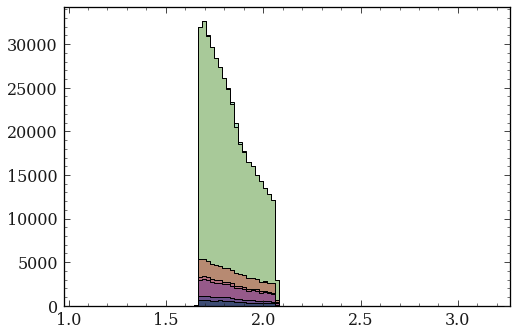

In [9]:
draw_stack_include_signal(df=df, df_no_signal=df_no,bins=100, vector='phi')

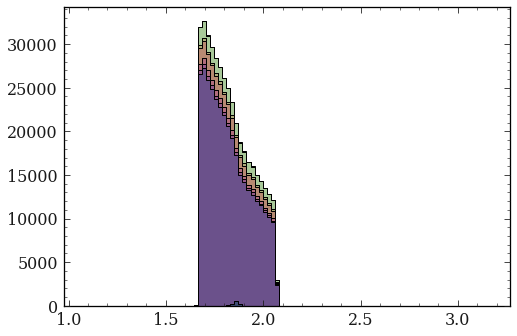

In [10]:
variables = list(df.columns)
variables = ['D0_M']
ccbar_bkg = df_no[df_no['class']=='ccbar']
signal    = df[df['Dstarp_isSignal']==1]

charged_bkg = df[df['class']=='charged']
mixed_bkg = df[df['class']=='mixed']
uubar_bkg = df[df['class']=='uubar']
ddbar_bkg = df[df['class']=='ddbar']
ssbar_bkg = df[df['class']=='ssbar']
taupair_bkg = df[df['class']=='taupair']

#data_list = {}
labels = ['signal', 'ccbar', 'charged', 'mixed', 'uubar', 'ddbar', 'ssbar', 'taupair']
for var in variables:
    data_list  = [signal[var], ccbar_bkg[var], charged_bkg[var], mixed_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var] ] 
    colors=sns.cubehelix_palette(8, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)

    plt.hist(data_list, bins=100, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

In [138]:
phi_extraction = read_yaml_to_dict("cuts")
new_Cuts = combine_cuts(phi_extraction, 'phi_extraction')

df_phi_extraction = df.query(new_Cuts)
df_no_phi_extraction = df_no.query(new_Cuts)

{'D0_M': 'M(D^0)', 'Dstarp_Q': 'Q', 'D0_cosHel_0': 'mathrm{cos}Hel_0', 'Dstarp_CMS_p': 'P_{D^{*+}_{CMS}}', 'gamma_E': 'E_{gamma}', 'gamma_clusterSecondMoment': 'clusterSecondmoment(gamma)', '__ncandidates__': 'ncandidiates', '__experiment__': 'experiment', '__run__': 'run', '__event__': 'event', 'Dstarp_isSignal': 'Dstarp isSignal', 'D0_isSignal': 'D0 isSignal', 'Phi_InvM': 'M(/phi)', 'Rho_InvM': 'M(/rho^0)', 'antiKstar_InvM': 'M(/bar{K}^{*0})', 'Omega_InvM': 'M(/omega)'}


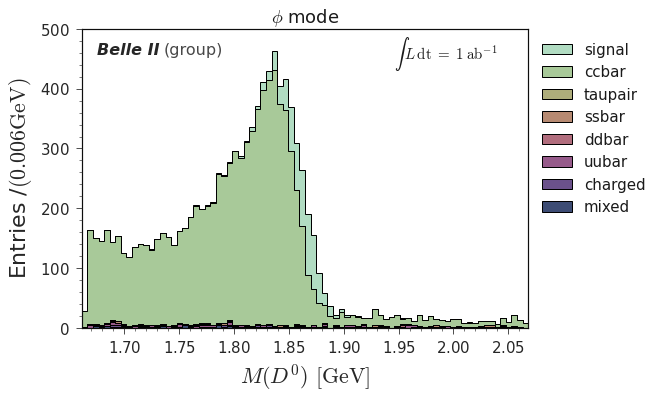

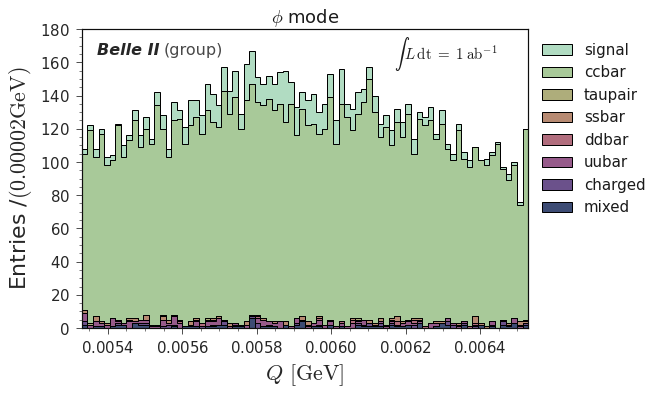

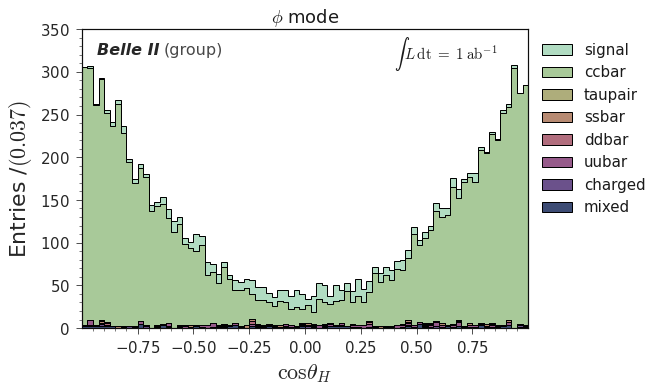

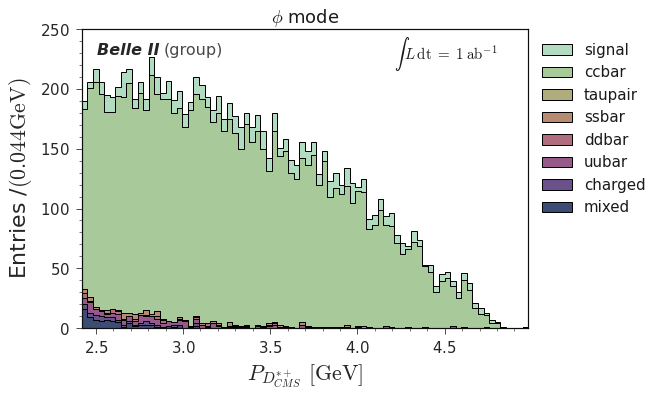

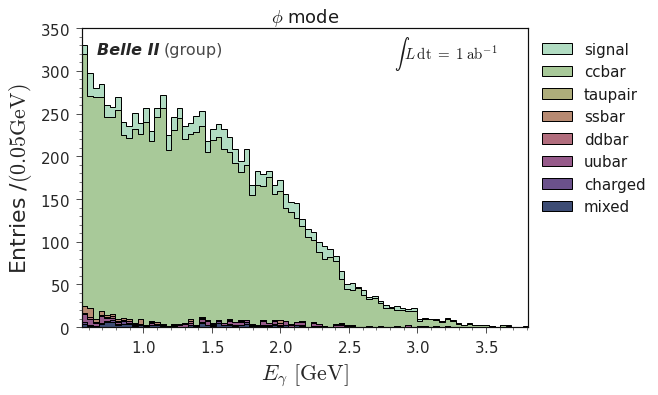

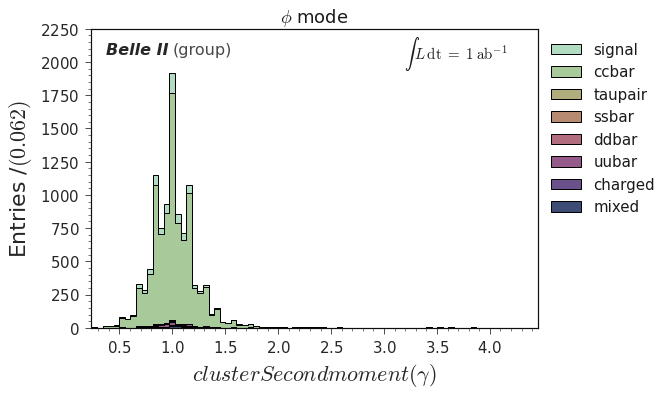

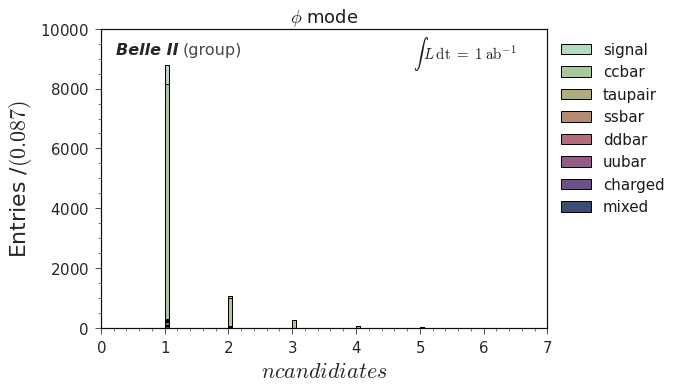

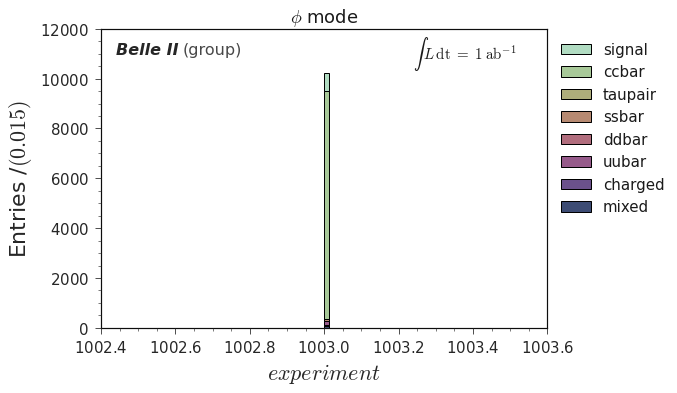

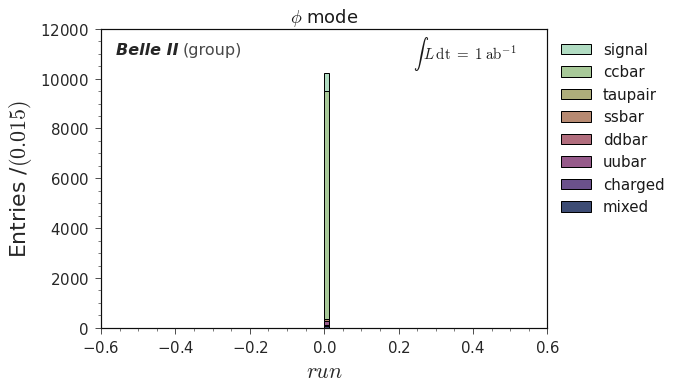

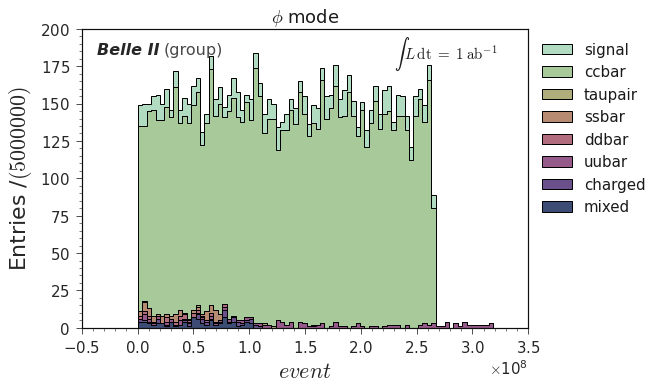

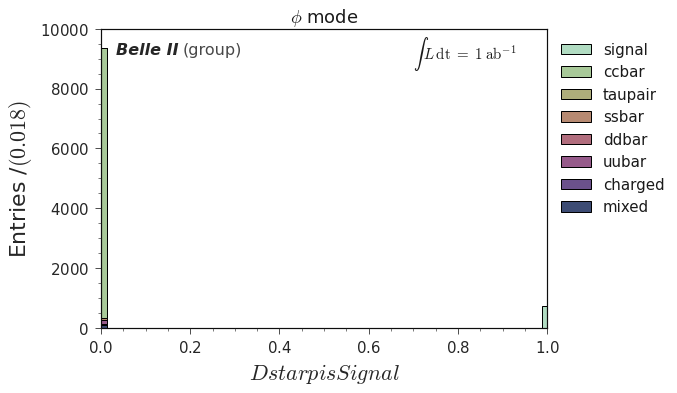

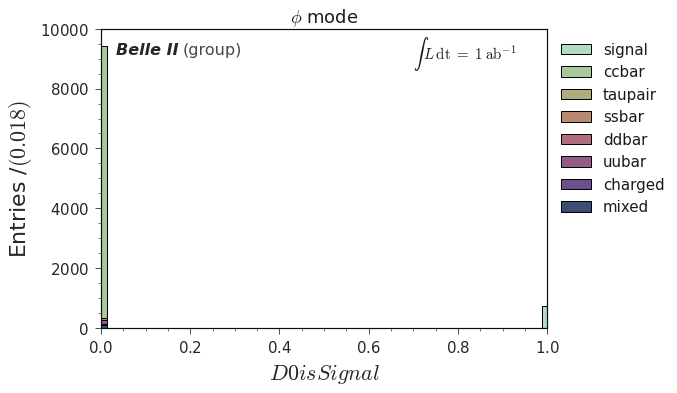

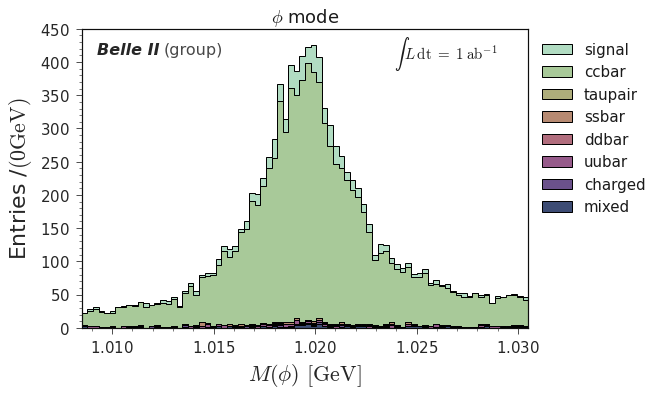

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [142]:
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']
print(var_name_phi)
plot_title = r'$\phi$ mode'
draw_stack_include_signal(df=df_phi_extraction, df_no_signal=df_no_phi_extraction,bins=80, vector='phi', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title)            



In [122]:
phi_extraction = read_yaml_to_dict("cuts")
new_Cuts = combine_cuts(phi_extraction, 'phi_extraction')

df_phi_extraction = df.query(new_Cuts)
df_no_phi_extraction = df_no.query(new_Cuts)

{'D0_M': 'M(D^0)', 'Dstarp_Q': 'Q', 'D0_cosHel_0': 'mathrm{cos}Hel_0', 'Dstarp_CMS_p': 'P_{D^{*+}_{CMS}}', 'gamma_E': 'E_{gamma}', 'gamma_clusterSecondMoment': 'clusterSecondmoment(gamma)', '__ncandidates__': 'ncandidiates', '__experiment__': 'experiment', '__run__': 'run', '__event__': 'event', 'Dstarp_isSignal': 'Dstarp isSignal', 'D0_isSignal': 'D0 isSignal', 'Phi_InvM': 'M(/phi)', 'Rho_InvM': 'M(/rho^0)', 'antiKstar_InvM': 'M(/bar{K}^{*0})', 'Omega_InvM': 'M(/omega)'}


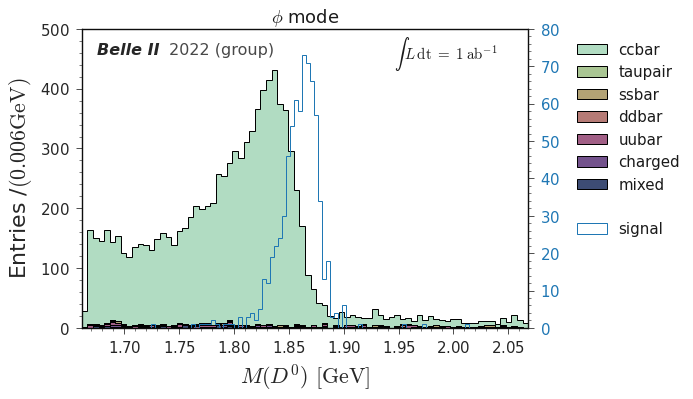

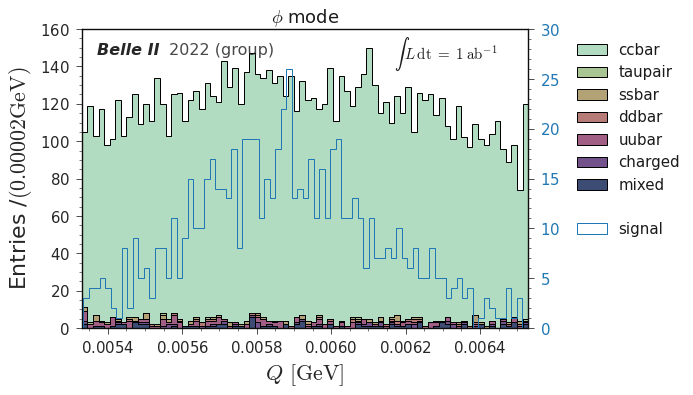

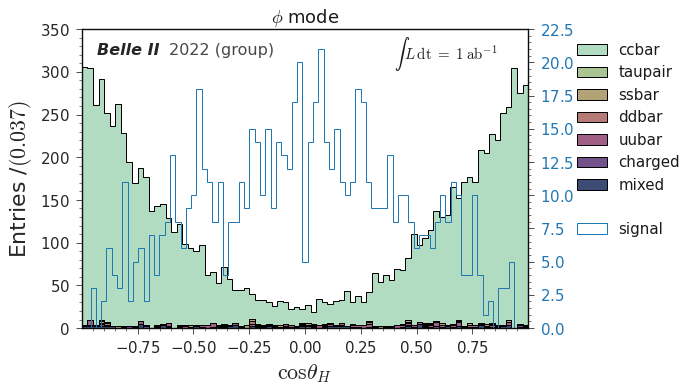

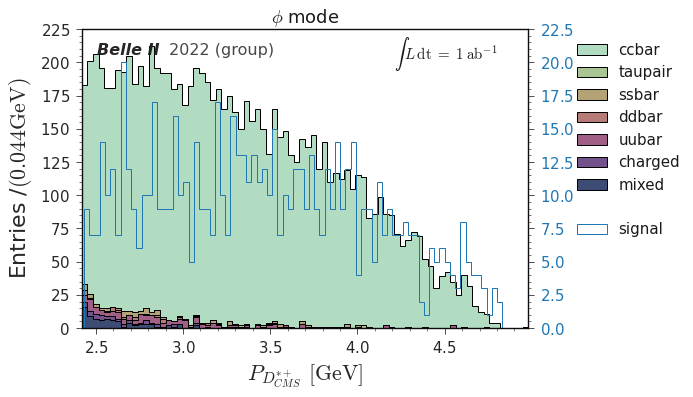

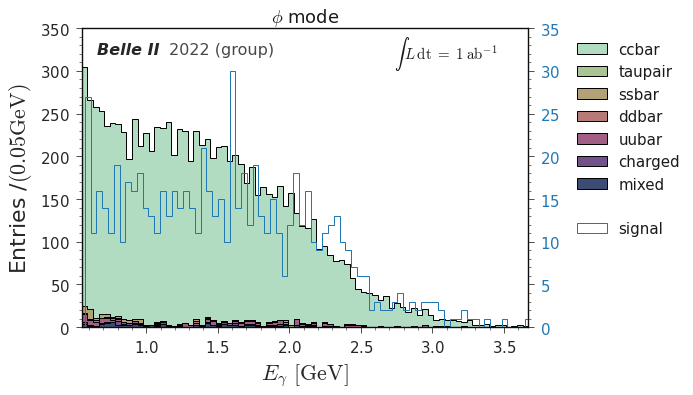

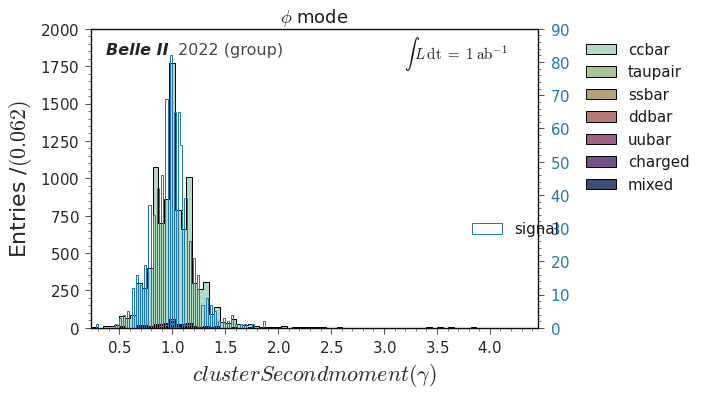

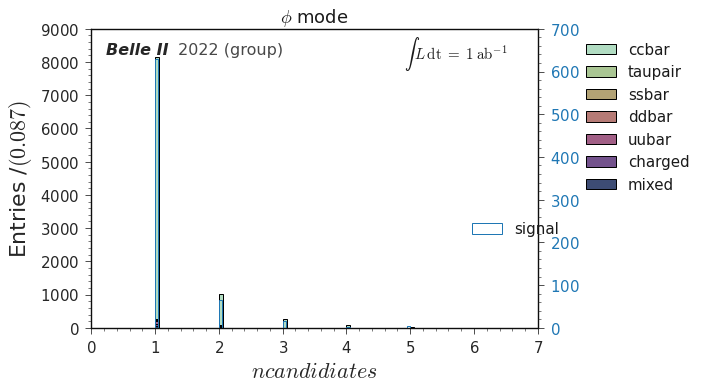

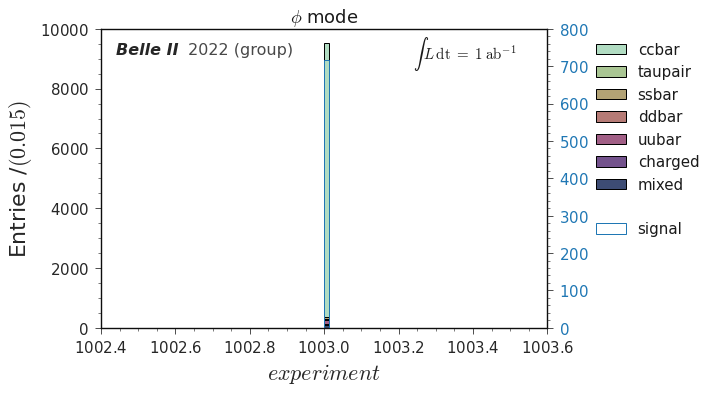

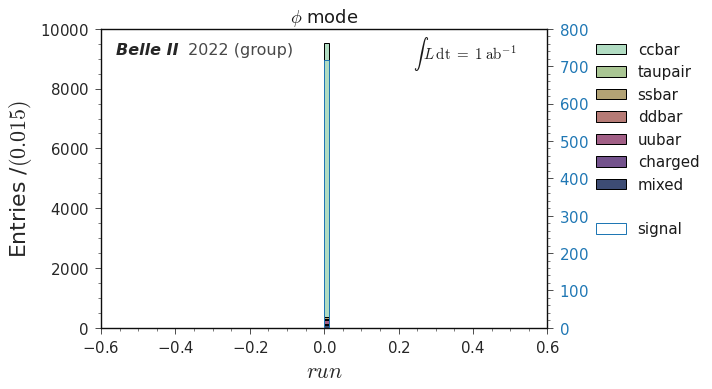

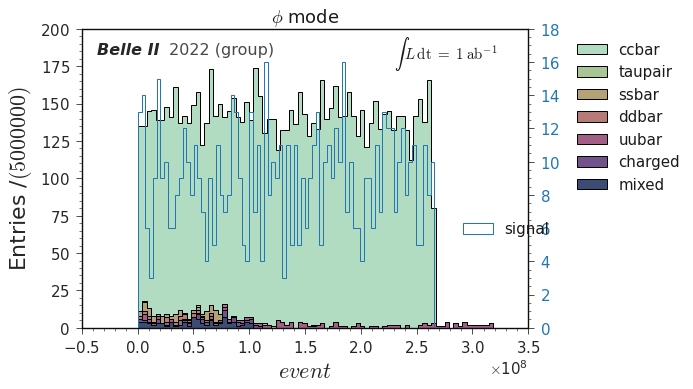

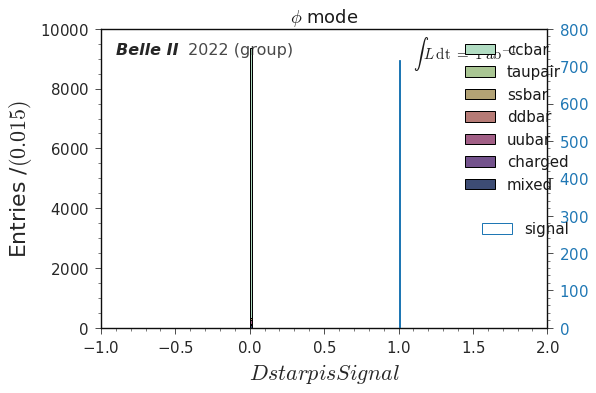

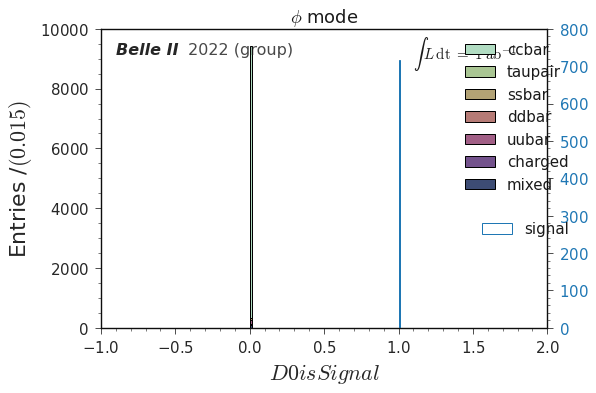

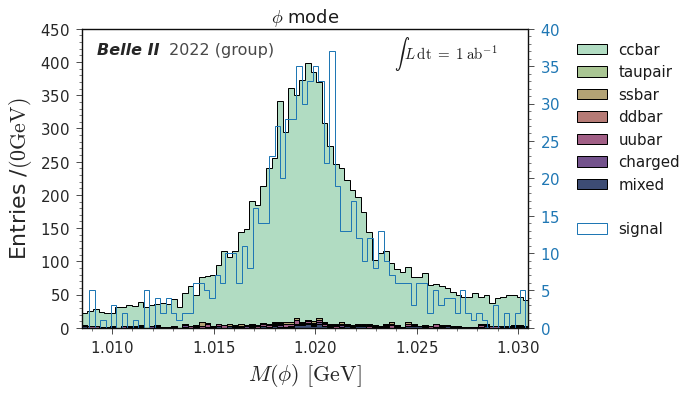

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [147]:
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']
print(var_name_phi)
plot_title = r'$\phi$ mode'
draw_stack_except_signal(df=df_phi_extraction, df_no_signal=df_no_phi_extraction,bins=80, vector='phi', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=plot_title)            

